# **Introduction**
## **A Data Science Approach to Predict the Best Candidates to Be Targeted for a Marketing Campaign**

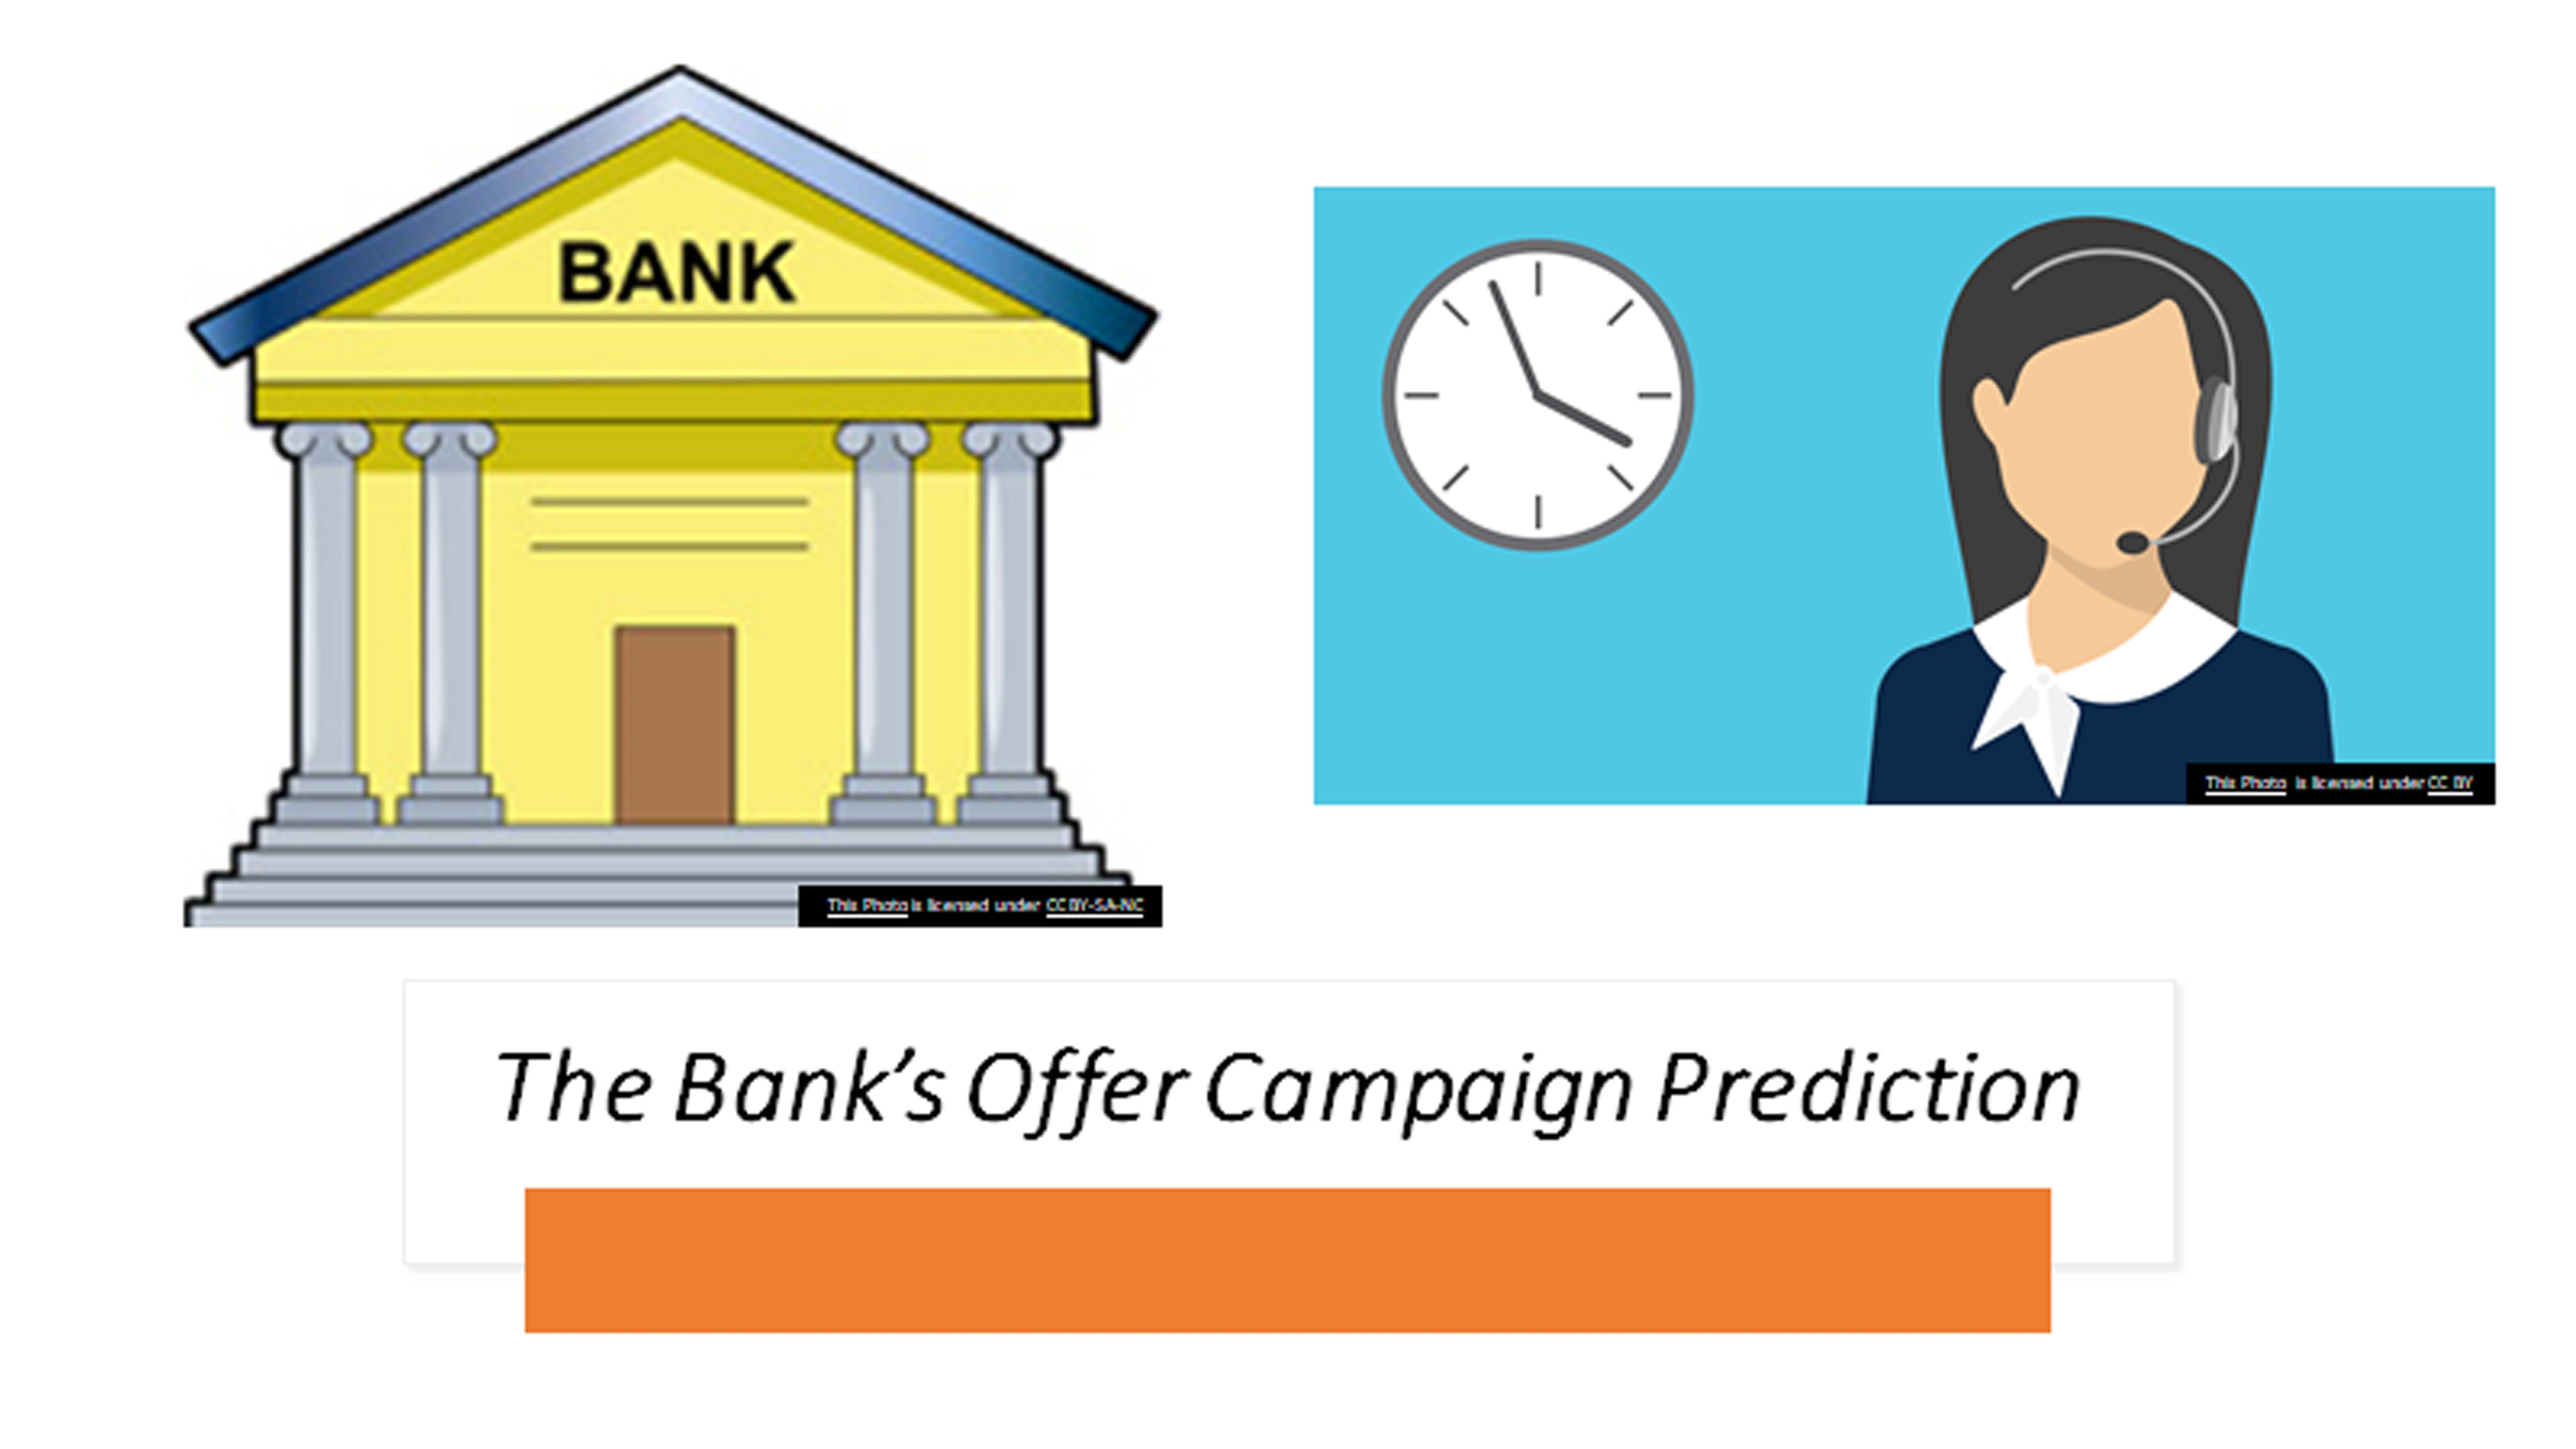

## **About the Project**

### **Link for Presentation**
https://www.canva.com/design/DAFRYFrl5Pg/e7T8DLgE7iFF4cTgn2iagA/view?utm_content=DAFRYFrl5Pg&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink

#### This Machine Learning project is based on the 2014 original study: "A data-driven approach to predict the success of bank telemarketing" (can be found here) in which the authors conducted a Data Mining (DM) project to predict the success of telemarketing calls for selling bank long-term deposits of a Portuguese retail bank.

#### Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

### Can we develop a data-driven approach to help the bank increase its success rate of telemarketing while incorporating the economic context?

#### Several other questions can be raised at this point:
#### **1. How did the economic crisis affect consumer behaviour and how did it manifest itself in the data?**
#### **2. How does one’s education, marital status, job, etc. affect their economic choices?**
#### **3. Do people prefer being called on the mobile phone or landline?**
#### **4. Does a predictive model exist that can predict a telemarketing outcome using client and economic data?**

## **Problem Statement**
### The business problem is a binary classification problem. The classification goal is to predict if the client contacted through the marketing campaign will subscribe a term deposit.

## **Data Set Description**
#### The bank marketing data set was collected by Moro, Cortez, and Rita (2014) and ordered by date ranging from May 2008 to November 2010. The data was ordered by date even though its year has to be inferred manually. The 20 input features were categorized and described as follows:

### **A. Bank client data:**
#### **age**: age
#### **job**: type of job
#### **marital**: marital status
#### **education**: education level
#### **default**: has credit in default?
#### **housing**: has housing loan?
#### **loan**: has personal loan?
### **B. Related with the last contact of the current campaign:**
#### **contact**: contact communication type
#### **month**: last contact month of year
#### **day_of_week**: last contact day of the week
#### **duration**: last contact duration, in seconds
### **C. Other attributes:**
#### **campaign**: number of contacts performed during this campaign and for this client
#### **pdays**: number of days that passed by after the client was last contacted from a previous campaign
#### **previous**: number of contacts performed before this campaign and for this client
#### **poutcome**: outcome of the previous marketing campaign
### **D. Social and economic context attributes:**
#### **emp.var.rate**: employment variation rate, quarterly indicator
#### **cons.price.idx**: consumer price index, monthly indicator
#### **cons.conf.idx**: consumer confidence index, monthly indicator
#### **euribor3m**: euribor 3 month rate, daily indicator
#### **nr.employed**: number of employees, quarterly indicator
### **Output variable:**
#### **y**: has the client subscribed a term deposit?

# **Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
import pickle
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
from sklearn.svm import SVC
warnings.filterwarnings('ignore')

# **Importing Datasets**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/RoshanYada/Bank_Marketing/main/bank-additional-full.csv", sep = ";", on_bad_lines = 'warn')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## **Shape and Size of Datasets**

#### So Dataset has 41,188 entries with 21 features

In [ ]:
df.shape

(41188, 21)

In [ ]:
df.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


#**Basic info of the dataset**
The first questions that need to be answered are the following:


*   How many features are available?
*   How many clients are in the dataset?
*   Are there any duplicated records?
*   How many clients subscribed the term deposit ?





In [ ]:
print(f"Number of clients: .............. {df.shape[0]}") # Number of observations
print(f"Number of variables: ............ {df.shape[1]} incl. target") # Number of variables or attributes
print(f"Number of duplicate entries: .... {df.duplicated().sum()}")# Number of Duplicates

Number of clients: .............. 41188
Number of variables: ............ 21 incl. target
Number of duplicate entries: .... 12


In [ ]:
df = df.drop_duplicates(keep='first')

### **Type of variables**

In [ ]:
df.dtypes.sort_values(ascending=True)

age                 int64
previous            int64
pdays               int64
campaign            int64
duration            int64
nr.employed       float64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
housing            object
loan               object
contact            object
month              object
day_of_week        object
education          object
marital            object
job                object
poutcome           object
default            object
y                  object
dtype: object

### **Counting variables by type**

In [ ]:
df.dtypes.value_counts(ascending=True)

int64       5
float64     5
object     11
dtype: int64

### **Detecting missing values**

In [ ]:
display(df.isnull().sum())
print("")
print(f"Are there any missing values? {df.isnull().values.any()}")

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


Are there any missing values? False


### **Renaming some columns for better typing and calling variables**

In [ ]:
df.rename(columns={"emp.var.rate":"emp_var_rate",
                   "cons.price.idx":"cons_price_idx",
                   "cons.conf.idx":"cons_conf_idx",
                   "nr.employed":"nr_employed"}
          ,inplace=True)

In [ ]:
# Numerical Features
numerical_cols = list(df.select_dtypes(exclude = ['object']))
print("Numerical Columns are : ", numerical_cols)

Numerical Columns are :  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']


In [ ]:
# Categorical Features
categorical_cols = list(df.select_dtypes(include = ['object']))
print("Categorical Columns are : ", categorical_cols)

Categorical Columns are :  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


### **Converting the Target from Binary(Categoric) into Binary(Numeric)**

In [ ]:
df['target'] = df.apply(lambda row: 1 if row["y"] == "yes" else 0, axis=1)
df.drop(["y"],axis=1,inplace=True)

#**Feature Explorations**

In [ ]:
cols = df.columns
print("Features in Datasets: ")
print(cols)
print("\nNo of Features in Dataset: ", len(cols))

Features in Datasets: 
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'target'],
      dtype='object')

No of Features in Dataset:  21


### **Statistical Description of Numerical Features**

In [ ]:
numerical_cols = list(df.select_dtypes(exclude = ['object']))
describe=df[numerical_cols].describe()
describe = describe.append(pd.Series(df[numerical_cols].nunique(), name='Unique Values'))
describe = describe.append(pd.Series(df[numerical_cols].isnull().sum(), name='Missing Values'))
describe = describe.append(pd.Series(df[numerical_cols].var(), name='Variance'))
describe = describe.append(pd.Series(df[numerical_cols].skew(), name='Skewness'))
describe = describe.append(pd.Series(df[numerical_cols].kurtosis(), name='Kurtosis'))
describe.T

,count,mean,std,min,25%,50%,75%,max,Unique Values,Missing Values,Variance,Skewness,Kurtosis
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000,78.0,0.0,108.590569,0.784560,0.791113
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000,1544.0,0.0,67239.249475,3.262808,20.243771
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000,42.0,0.0,7.674664,4.762044,36.971857
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000,27.0,0.0,34945.480000,-4.921386,22.221553
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000,8.0,0.0,0.244990,3.831396,20.102164
emp_var_rate,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400,10.0,0.0,2.467672,-0.724061,-1.062698
cons_price_idx,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767,26.0,0.0,0.335055,-0.230853,-0.829851
cons_conf_idx,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900,26.0,0.0,21.417088,0.302876,-0.359097
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045,316.0,0.0,3.008272,-0.709194,-1.406791
nr_employed,41176.0,5167.034870,72.251364,4963.600,5099.100,5191.000,5228.100,5228.100,11.0,0.0,5220.259596,-1.044317,-0.003540


_**Variable: Age**_

In [ ]:
df_age = pd.DataFrame(df['age'].value_counts()).reset_index()
df_age.rename(columns = {'index':'age', 'age':'count'}, inplace= True)

fig = px.pie(df_age, values='count', names='age', hole = 0.05, color_discrete_map='age_bins',color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(textposition='inside', textinfo='percent+label',marker=dict(line=dict(color='#FFFFFF', width=1)))
fig.update_layout(title_text="Percentage distribution with regard to Age",title_x=0.5)
fig.show()

In [ ]:
df['age_bins'] = pd.cut(df['age'], bins = [df['age'].min(), 30, 60, df['age'].max()],
                  labels=['Young', 'Adult', 'Senior'])
#Young (<=30), Adult (>30 to <=60) and Senior (>60)

group_age_target = df.groupby(['age_bins'])['target'].mean().multiply(100)


# Display graph
df_age_bins = pd.DataFrame(df['age_bins'].value_counts()).reset_index()
df_age_bins.rename(columns = {'index':'age_bins', 'age_bins':'count'}, inplace= True)


fig = px.pie(df_age_bins, values = 'count', names = 'age_bins', hole = 0.05,color_discrete_map='age_bins', color_discrete_sequence=px.colors.qualitative.Dark2)
fig.update_traces(textposition='inside', textinfo='percent+label',marker=dict(line=dict(color='#FFFFFF', width=2)))
fig.update_layout(title_text="Age Group-wise Distribution in Dataset",title_x=0.5)

fig.show()

### **Description of Categorical Features**

#### ***Variable: Job***

In [ ]:
# General stats description
stats_job = {'Designation': ['Value'],
            'Variable': 'job',
            'Description': 'type of job',
            'Type of variable': df.job.dtype,
            'Total observations': df.job.shape[0],
            'Unique values': df.job.nunique(),
           }

st_job = pd.DataFrame(stats_job, columns = ['Designation',
                                     'Variable',
                                     'Description',
                                     'Type of variable',
                                     'Total observations',
                                     'Unique values',
                                        ])
st_job.set_index("Designation", inplace=True)

results_job = st_job.T
resultsT = st_job
display(results_job)
print(f"List of unique values: {df.job.unique()}")

Designation,Value
Variable,job
Description,type of job
Type of variable,object
Total observations,41176
Unique values,12


List of unique values: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [ ]:
df_job = pd.DataFrame(df['job'].value_counts()).reset_index()
df_job.rename(columns = {'index':'job', 'job':'count'}, inplace= True)

fig = px.pie(df_job, values='count', names='job', hole = 0.05,color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(textposition='inside', textinfo='percent+label',marker=dict(line=dict(color='#FFFFFF', width=2)))
fig.update_layout(title_text="Percentage distribution of Job",title_x=0.5)
fig.show()

#### ***Variable: Marital***

In [ ]:
# General stats description
stats_marital = {'Designation': ['Value'],
            'Variable': 'Marital',
            'Description': 'Marital situation',
            'Type of variable': df.marital.dtype,
            'Total observations': df.marital.shape[0],
            'Unique values': df.marital.nunique(),
           }

st_marital = pd.DataFrame(stats_marital, columns = ['Designation',
                                     'Variable',
                                     'Description',
                                     'Type of variable',
                                     'Total observations',
                                     'Unique values',
                                        ])
st_marital.set_index("Designation", inplace=True)

results_marital = st_marital.T
resultsT = st_marital
display(results_marital)
print(f"List of unique values: {df.marital.unique()}")

Designation,Value
Variable,Marital
Description,Marital situation
Type of variable,object
Total observations,41176
Unique values,4


List of unique values: ['married' 'single' 'divorced' 'unknown']


In [ ]:
# Graph
df_marital = pd.DataFrame(df['marital'].value_counts()).reset_index()
df_marital.rename(columns = {'index':'marital', 'marital':'count'}, inplace= True)

fig = px.pie(df_marital, values='count', names='marital', hole = 0.05, color_discrete_sequence=px.colors.qualitative.Bold)
fig.update_traces(textposition='inside', textinfo='percent+label',marker=dict(line=dict(color='#FFFFFF', width=2)))
fig.update_layout(title_text="Percentage distribution with regard to Marital Status",title_x=0.5)
fig.show()


#### ***Variable: Education***

In [ ]:
# General stats description
stats_education = {'Designation': ['Value'],
            'Variable': 'Education',
            'Description': 'Education level',
            'Type of variable': df.education.dtype,
            'Total observations': df.education.shape[0],
            'Unique values': df.education.nunique(),
           }

st_education = pd.DataFrame(stats_education, columns = ['Designation',
                                     'Variable',
                                     'Description',
                                     'Type of variable',
                                     'Total observations',
                                     'Unique values',
                                        ])
st_education.set_index("Designation", inplace=True)

results_education = st_education.T
resultsT = st_education
display(results_education)
print(f"List of unique values: {df.education.unique()}")

Designation,Value
Variable,Education
Description,Education level
Type of variable,object
Total observations,41176
Unique values,8


List of unique values: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [ ]:
# Graph "pie"
df_education = pd.DataFrame(df['education'].value_counts()).reset_index()
df_education.rename(columns = {'index':'education', 'education':'count'}, inplace= True)

fig = px.pie(df_education, values='count', names='education', hole = 0.05, color_discrete_sequence=px.colors.sequential.Plasma)
fig.update_traces(textposition='inside', textinfo='percent+label',marker=dict(line=dict(color='#FFFFFF', width=2)))
fig.update_layout(title_text="Education of Customers",title_x=0.45)
fig.show()


#### ***Variable: Default***

In [ ]:
stats_default = {'Designation': ['Value'],
            'Variable': 'Default',
            'Description': 'Credit in default?',
            'Type of variable': df.default.dtype,
            'Total observations': df.default.shape[0],
            'Unique values': df.default.nunique(),
           }

st_default = pd.DataFrame(stats_default, columns = ['Designation',
                                     'Variable',
                                     'Description',
                                     'Type of variable',
                                     'Total observations',
                                     'Unique values',
                                        ])
st_default.set_index("Designation", inplace=True)

results_default = st_default.T
resultsT = st_default
display(results_default)
print(f"List of unique values: {df.default.unique()}")

Designation,Value
Variable,Default
Description,Credit in default?
Type of variable,object
Total observations,41176
Unique values,3


List of unique values: ['no' 'unknown' 'yes']


In [ ]:
# Graph "pie"
df_default = pd.DataFrame(df['default'].value_counts()).reset_index()
df_default.rename(columns = {'index':'default', 'default':'count'}, inplace= True)

fig = px.pie(df_default, values='count', names='default', hole = 0.05,color_discrete_sequence=px.colors.sequential.Agsunset)
fig.update_traces(textposition='inside', textinfo='percent+label',marker=dict(line=dict(color='#FFFFFF', width=2)))
fig.update_layout(title_text="Customer Having Credit in Default",title_x=0.45)
fig.show()

#### ***Variable: Housing***

In [ ]:
# General stats description
stats_housing = {'Designation': ['Value'],
            'Variable': 'Housing',
            'Description': 'Housing Loan',
            'Type of variable': df.housing.dtype,
            'Total observations': df.housing.shape[0],
            'Unique values': df.housing.nunique(),
           }

st_housing = pd.DataFrame(stats_housing, columns = ['Designation',
                                     'Variable',
                                     'Description',
                                     'Type of variable',
                                     'Total observations',
                                     'Unique values',
                                        ])
st_housing.set_index("Designation", inplace=True)

results_housing = st_housing.T
resultsT = st_housing
display(results_housing)
print(f"List of unique values: {df.housing.unique()}")

Designation,Value
Variable,Housing
Description,Housing Loan
Type of variable,object
Total observations,41176
Unique values,3


List of unique values: ['no' 'yes' 'unknown']


In [ ]:
df_housing = pd.DataFrame(df['housing'].value_counts()).reset_index()
df_housing.rename(columns = {'index':'housing', 'housing':'count'}, inplace= True)

fig = px.pie(df_housing, values='count', names='housing', color_discrete_sequence=px.colors.sequential.RdBu, hole = 0.05)
fig.update_traces(textposition='inside', textinfo='percent+label',marker=dict(line=dict(color='#FFFFFF', width=2)))
fig.update_layout(title_text="Customers with Housing Loan",title_x=0.5)
fig.show()

#### ***Variable: Loan***

In [ ]:
# General stats description
stats_loan = {'Designation': ['Value'],
            'Variable': 'Loan',
            'Description': 'Personal Loan',
            'Type of variable': df.loan.dtype,
            'Total observations': df.loan.shape[0],
            'Unique values': df.loan.nunique(),
           }

st_loan = pd.DataFrame(stats_loan, columns = ['Designation',
                                     'Variable',
                                     'Description',
                                     'Type of variable',
                                     'Total observations',
                                     'Unique values',
                                        ])
st_loan.set_index("Designation", inplace=True)

results_loan = st_loan.T
resultsT = st_loan
display(results_loan)
print(f"List of unique values: {df.loan.unique()}")

Designation,Value
Variable,Loan
Description,Personal Loan
Type of variable,object
Total observations,41176
Unique values,3


List of unique values: ['no' 'yes' 'unknown']


In [ ]:
df_loan = pd.DataFrame(df['loan'].value_counts()).reset_index()
df_loan.rename(columns = {'index':'loan', 'loan':'count'}, inplace= True)

fig = px.pie(df_loan, values='count', names='loan', color_discrete_sequence=px.colors.sequential.Aggrnyl, hole = 0.05)
fig.update_traces(textposition='inside', textinfo='percent+label',marker=dict(line=dict(color='#FFFFFF', width=2)))
fig.update_layout(title_text="Customers with Personal Loan",title_x=0.45)
fig.show()


#### ***Variable: Poutcome***

In [ ]:
# General stats description
stats_poutcome = {'Designation': ['Value'],
            'Variable': 'Poutcome',
            'Description': 'Outcome of the previous marketing campaign',
            'Type of variable': df.poutcome.dtype,
            'Total observations': df.poutcome.shape[0],
            'Unique values': df.poutcome.nunique(),
           }

st_poutcome = pd.DataFrame(stats_poutcome, columns = ['Designation',
                                     'Variable',
                                     'Description',
                                     'Type of variable',
                                     'Total observations',
                                     'Unique values',
                                        ])
st_poutcome.set_index("Designation", inplace=True)

results_poutcome = st_poutcome.T
resultsT = st_poutcome
display(results_poutcome)
print(f"List of unique values: {df.poutcome.unique()}")

Designation,Value
Variable,Poutcome
Description,Outcome of the previous marketing campaign
Type of variable,object
Total observations,41176
Unique values,3


List of unique values: ['nonexistent' 'failure' 'success']


In [ ]:
df_poutcome = pd.DataFrame(df['poutcome'].value_counts()).reset_index()
df_poutcome.rename(columns = {'index':'poutcome', 'poutcome':'count'}, inplace= True)

fig = px.pie(df_poutcome, values='count', names='poutcome', color_discrete_sequence=px.colors.sequential.Agsunset, hole = 0.05)
fig.update_traces(textposition='inside', textinfo='percent+label',marker=dict(line=dict(color='#FFFFFF', width=2)))
fig.update_layout(title_text="Outcome of the Previous Campaign",title_x=0.48)
fig.show()

### ***Variable: Contact***

In [ ]:
# General stats description
stats_contact = {'Designation': ['Value'],
            'Variable': 'Contact',
            'Description': 'Contact Communication Type',
            'Type of variable': df.contact.dtype,
            'Total observations': df.contact.shape[0],
            'Unique values': df.contact.nunique(),
           }

st_contact = pd.DataFrame(stats_contact, columns = ['Designation',
                                     'Variable',
                                     'Description',
                                     'Type of variable',
                                     'Total observations',
                                     'Unique values',
                                        ])
st_contact.set_index("Designation", inplace=True)

results_contact = st_contact.T
resultsT = st_contact
display(results_contact)
print(f"List of unique values: {df.contact.unique()}")

Designation,Value
Variable,Contact
Description,Contact Communication Type
Type of variable,object
Total observations,41176
Unique values,2


List of unique values: ['telephone' 'cellular']


In [ ]:
df_contact = pd.DataFrame(df['contact'].value_counts()).reset_index()
df_contact.rename(columns = {'index':'contact', 'contact':'count'}, inplace= True)

fig = px.pie(df_contact, values='count', names='contact', color_discrete_sequence=px.colors.sequential.Viridis, hole = 0.05)
fig.update_traces(textposition='inside', textinfo='percent+label',marker=dict(line=dict(color='#FFFFFF', width=2)))
fig.update_layout(title_text="Communication Type",title_x=0.48)
fig.show()

## **Checking Unique Values of All the Columns**

In [ ]:
cols = df.columns
for col in cols:
  print(col + ":\n")
  print(df[col].unique())
  print("---"*30)
  print("\n")

age:

[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
------------------------------------------------------------------------------------------


job:

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
------------------------------------------------------------------------------------------


marital:

['married' 'single' 'divorced' 'unknown']
------------------------------------------------------------------------------------------


education:

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
------------------------------------------------------------------------------------------


default:

['no' 'unknown' 'yes']
---------------

# **Dealing with Missing Values**



### There are unknown values for many variables in the Data set.

---


### Variables with unknown/missing values are: ‘education’, ‘job’, ‘housing’, ‘loan’, ‘default’, and ‘marital’. **But the significant ones are ‘education’, ‘job’, ‘housing’, and ‘loan’.**

---


### The number of unknowns for ‘marital’ is very low.

---


### The unknown for ‘default’ variable is considered to be recorded as unknown. It may be possible that a customer is not willing to disclose this information to the banking representative. Hence the unknown value in ‘default’ is actually a separate value.

---

## **Imputing Without Causal Inference**

#### Now, to infer the missing values in ‘job’ and ‘education’, we make use of the cross-tabulation between ‘job’ and ‘education’. Our hypothesis here is that ‘job’ is influenced by the ‘education’ of a person. Hence, we can infer ‘job’ based on the education of the person.
#### *Moreover, since we are just filling the missing values, we are not much concerned about the causal inference. We, therefore, can use the job to predict education.*

In [ ]:
# Defining Cross Tabulation Function
def cross_tab(df, f1, f2):
  jobs = list(df[f1].unique())
  edu = list(df[f2].unique())
  dataframes = []
  for e in edu:
    dfe = df[df[f2] == e]
    dfejob = dfe.groupby(f1).count()[f2]
    dataframes.append(dfejob)
  dataframes_final = pd.concat(dataframes, axis = 1)
  dataframes_final.columns = edu
  dataframes_final = dataframes_final.fillna(0)
  return dataframes_final

### **Removing Unknown Values for Marital Status**

In [ ]:
df = df[df['marital'] != 'unknown']

### **Cross Tabulation between Job and Education**

In [ ]:
# Making Cross Table for job and education features for imputations which is explained later
cross_tab(df, 'job', 'education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
job,,,,,,,,
admin.,77,3328,151,499,362,249,5738,1.0
blue-collar,2315,875,1422,3620,453,452,94,8.0
entrepreneur,137,233,71,210,135,57,608,2.0
housemaid,473,174,77,94,59,42,137,1.0
management,100,297,85,166,89,123,2061,0.0
retired,595,276,75,143,241,97,283,3.0
self-employed,93,118,23,220,166,29,764,3.0
services,132,2676,226,388,217,149,173,0.0
student,26,357,13,98,43,167,170,0.0


### ***Inferences from Cross Tabulation***

#### **Inferring Education from Jobs**
#### From the cross tabulation, it can be seen that people with management jobs usually have a university degree. Hence and similarly, we can conclude:
#### **‘job’ = management → ‘education’ = ‘university.degree’**
#### **‘job’ = ‘services’ → ‘education’ = ‘high.school’**
#### **‘job’ = ‘housemaid’ → ‘education’ = ‘basic.4y’**
#### **‘job’ = 'self-employed' → ‘education’ = ‘professional.course’**
#### **‘job’ = 'student' → ‘education’ = 'high.school'**
#### **‘job’ = 'admin.' → ‘education’ = 'university.degree'**
#### **‘job’ = 'technician' → ‘education’ = ‘professional.course’**

#### **Inferring Jobs from Education**
#### From cross tabulation, we can conclude this by observing large numbers:
#### **‘education’ = ‘basic.4y’ or ‘basic.6y’ or ‘basic.9y’ then the ‘job’ = ‘blue-collar’**
#### **‘education’ = ‘professional.course’, then the ‘job’ = ‘technician’**

#### **Inferring Jobs from Age**
#### *As we see, if **‘age’ > 60, then the ‘job’ is ‘retired’** which makes sense.*

In [ ]:
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
df.loc[(df['education'] == 'unknown') & (df['job'] == 'management'), 'education'] = 'university.degree'
df.loc[(df['education'] == 'unknown') & (df['job'] == 'services'), 'education'] = 'high.school'
df.loc[(df['education'] == 'unknown') & (df['job'] == 'housemaid'), 'education'] = 'basic.4y'
df.loc[(df['job'] == 'unknown') & ((df['education'] == 'basic.4y') | (df['education'] == 'basic.6y') | (df['education'] == 'basic.9y')), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'
df.loc[(df['education'] == 'unknown') & (df['job'] == 'self-employed'), 'education'] = 'professional.course'
df.loc[(df['education'] == 'unknown') & (df['job'] == 'student'), 'education'] = 'high.school'
df.loc[(df['education'] == 'unknown') & (df['job'] == 'admin.'), 'education'] = 'university.degree'
df.loc[(df['education'] == 'unknown') & (df['job'] == 'technician'), 'education'] = 'professional.course'

In [ ]:
cross_tab(df, 'job', 'education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
job,,,,,,,,
admin.,77.0,3328,151.0,499.0,362.0,0.0,5987,1.0
blue-collar,2363.0,875,1444.0,3651.0,453.0,452.0,94,8.0
entrepreneur,137.0,233,71.0,210.0,135.0,57.0,608,2.0
housemaid,515.0,174,77.0,94.0,59.0,0.0,137,1.0
management,100.0,297,85.0,166.0,89.0,0.0,2184,0.0
retired,599.0,276,75.0,143.0,243.0,111.0,284,3.0
self-employed,93.0,118,23.0,220.0,195.0,0.0,764,3.0
services,132.0,2825,226.0,388.0,217.0,0.0,173,0.0
student,26.0,524,13.0,98.0,43.0,0.0,170,0.0


#### **Since education is an important feature so, remaining unknowns for education are dropped**

In [ ]:
df.drop(df[df['education'] =='unknown'].index, inplace = True)

In [ ]:
df[df['education']=='unknown'].shape

(0, 22)

#### **We have reduced unknowns to very little percentage of the data which will not affect our models.**

### **Cross Tabulation Between Job and House Loan**

In [ ]:
# Cross Tabulation between house loan and job
print('Cross Tabulation between house loan and job:')
print(cross_tab(df, 'job', 'housing'))
print("--"*24)
# Cross Tabulation between personal loan and job
print('Cross Tabulation between personal loan and job:')
print(cross_tab(df, 'job', 'loan'))

Cross Tabulation between house loan and job:
                 no   yes  unknown
job                               
admin.         4627  5551      227
blue-collar    4112  4547      229
entrepreneur    612   748       36
housemaid       490   538       29
management     1361  1489       71
retired         732   851       40
self-employed   636   740       40
services       1815  2045      101
student         380   471       23
technician     2978  3612      147
unemployed      418   545       27
unknown          33    42        2
------------------------------------------------
Cross Tabulation between personal loan and job:
                 no   yes  unknown
job                               
admin.         8469  1709      227
blue-collar    7338  1321      229
entrepreneur   1162   198       36
housemaid       874   154       29
management     2411   439       71
retired        1359   224       40
self-employed  1182   194       40
services       3261   599      101
student         70

### **Imputation**

In [ ]:
# Student will not be taking housing loan
df.loc[(df['job'] == 'student') & (df['housing'] == 'unknown'), 'housing'] = 'no'

In [ ]:
# Filling housing column with most frequent entries
df.housing.replace('unknown',df.housing.mode()[0],inplace=True)

In [ ]:
# AS housing is filled, filling loan similarly
df.loan.replace('unknown',df.loan.mode()[0],inplace=True)

In [ ]:
# Similarly, filling job as similar as above
df.job.replace('unknown',df.job.mode()[0],inplace=True)

In [ ]:
cross_tab(df, 'job', 'housing')

,no,yes
job,,
admin.,4660,5822
blue-collar,4112,4776
entrepreneur,612,784
housemaid,490,567
management,1361,1560
retired,732,891
self-employed,636,780
services,1815,2146
student,403,471


In [ ]:
cross_tab(df, 'job', 'loan')

,no,yes
job,,
admin.,8759,1723
blue-collar,7567,1321
entrepreneur,1198,198
housemaid,903,154
management,2482,439
retired,1399,224
self-employed,1222,194
services,3362,599
student,732,142


### **Imputing Numerical Features**
#### From the source of the data (U.C. Irvine ML Repository), we’re told that the missing values, or NaNs, are encoded as ‘999’. From the above table, it is clear that only ‘pdays’ has missing values. Moreover, a majority of the values for ‘pdays’ are missing.

In [ ]:
df[df['pdays'] == 999].count()[0]

38858

In [ ]:
# Imputing through mean values
df['pdays'] = np.where(df['pdays'] == 999,df[df['pdays'] < 999]['pdays'].mean(),df['pdays'])

In [ ]:
df[df['pdays'] == 999].count()[0]

0

#### *Hence, missing values are done imputing.*

## **Outliers Detection of Numerical Features using IQR**

In [ ]:
# creating new data frame of numerical columns
data_numerical = df[numerical_cols]
print('Shape of numerical dataframe {}'.format(data_numerical.shape))
data_numerical.head()

Shape of numerical dataframe (40345, 11)


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,target
0,56,261,1,6.01076,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,149,1,6.01076,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,226,1,6.01076,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,151,1,6.01076,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,307,1,6.01076,0,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
# shape of numerical dataframe
data_numerical.shape

(40345, 11)

In [ ]:
# Calculating first quantile,third quantile and interquantile range(IQR)
q3 = data_numerical.quantile(0.75)
q1 = data_numerical.quantile(0.25)
iqr = q3 - q1
print('IQR for Numerical Features:')
print('--'*14)
print(iqr)

IQR for Numerical Features:
----------------------------
age                15.000
duration          216.000
campaign            2.000
pdays               0.000
previous            0.000
emp_var_rate        3.200
cons_price_idx      0.919
cons_conf_idx       6.300
euribor3m           3.617
nr_employed       129.000
target              0.000
dtype: float64


### **Since, dataset contains larger percentage as outliers that's why it is not possible to delete these entries.**

In [ ]:
# Finding out how many entries are outliers.
data_out = df[~((data_numerical < (q1 - 1.5 * iqr)) |(data_numerical > (q3 + 1.5 * iqr))).any(axis=1)]
print('{} points are outliers based on IQR'.format(df.shape[0] - data_out.shape[0]))

12235 points are outliers based on IQR


### **An Attempt to Remove Outliers**
#### **Relationship Between No of Calls (Campaign) and Duration of Calls**


In [ ]:
df['duration'] = df['duration'].apply(lambda n:n/60).round(2)

In [ ]:
plt.figure(figsize = (20, 8))
duration_campaign = sns.scatterplot(x='duration', y='campaign',data = df,
                     hue = 'target')

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls', fontsize = 16)
plt.xlabel('Duration of Calls (Minutes)', fontsize = 16)
plt.title('The Relationship between the Number and Duration of Calls', fontsize = 24)
# Annotation
plt.show()

### **Cleaning Datas As Per Duration Columns**
##### **Dropping rows where call duration was less than 10 seconds**

In [ ]:
#[df.duration < 10/60]
df[df.duration < 10/60].shape

In [ ]:
# Dropped 290 rows
df = df.drop(df[df.duration < 10/60].index, axis = 0, inplace = False)
df.shape

# **EDA**

##**Univariate and Bivariate Analysis**

### **Target Variable**

**The first thing we explore is the target variable, which is a binary variable measuring the campaign outcome, representing whether a client has subscribed to a long-term deposit or not during our campaign.**

In [ ]:
ratio = df.target.value_counts()
ratio_df = pd.DataFrame([np.array(ratio.index), np.array(ratio.values)]).T
ratio_df.columns = ['Outcome', 'Number of People']
ratio_df['Outcome'] = ratio_df['Outcome'].apply(lambda x:'Yes' if x==1 else 'No')


fig = px.pie(ratio_df, values='Number of People', names='Outcome', color_discrete_sequence=px.colors.cyclical.HSV, hole = 0.3)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text="Campaign Outcome",title_x=0.48)
fig.show()


**There are more than 40,000 observations in our data set, and only 11.4% of them have positive
outcomes, which means that we have a significantly unbalanced data set.**

**Bining Age**

In [ ]:
# Putting Age into Bins
df.loc[df["age"] < 30,  'age'] = 20
df.loc[(df["age"] >= 30) & (df["age"] <= 39), 'age'] = 30
df.loc[(df["age"] >= 40) & (df["age"] <= 49), 'age'] = 40
df.loc[(df["age"] >= 50) & (df["age"] <= 59), 'age'] = 50
df.loc[df["age"] >= 60, 'age'] = 60

**1. Age**


In [ ]:
plt.figure(figsize =(20 ,8))
plt.subplot(1,2,1)
n_bins=5
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('absolute frequency')
plt.hist(data = df, x = 'age', bins = n_bins,density=True,color='navajowhite');
plt.axvline(df['age'].mean(), color='k', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(df['age'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df['age'].mean()))
plt.subplot(1,2,2)
sns.violinplot(x="target",y="age",data=df)
plt.title('Age v/s target')
plt.show()

In [ ]:
print("Percentage of client between 20 and 30:")
print(df.query('20 < age <= 30').shape[0]/df.shape[0] * 100)

print("Percentage of client between 30 and 40:")
print(df.query('30 < age <= 40').shape[0]/df.shape[0] * 100)

print("Percentage of client between 40 and 60:")
print(df.query('40 < age <= 60').shape[0]/df.shape[0] * 100)

**86.28% of the clients fall in age range of 20 - 60 years old.**

**2. Job**

In [ ]:
import plotly.express as px

fig = px.histogram(df, x="job",color='target',histnorm='percent',text_auto = True,
                color_discrete_map={
                '0' : '#071633',
                '1' : '#0DEFFF'
            },barmode="group")
fig.update_layout(title_text="Representation of various Profession in relation to target variable",title_x=0.48)

fig.show()

**The graph shows the outcome count in each job group, with the light green color denoting negative outcomes and purple color denoting the positive outcomes. There is a large
percentage of technicians, blue-collar workers and admins. However, it is students and retired
people that are most likely to say “yes” to the long-term deposit.**

**3. Marital Status**

In [ ]:
c=px.histogram(df, x="marital",color='target',
             color_discrete_sequence = ['#5F9DF7','#FF884B'],
             barmode="group", text_auto = True, histnorm='percent')
c.update_layout(title_text="Percentage of people with different marital status saying yes or no to term-deposit",title_x=0.48)

**Majority of the people have marital status as married or single.People who are married have subscribed for deposits more than people with any other marital status, they are also the one’s who have turned down the deposits offered by the bank the most.**

**4. Education**

In [ ]:
d=px.histogram(df, x="education",color='target',
             color_discrete_sequence = ['#00ADB5','#393E46'],
             barmode="group", text_auto = True, histnorm='percent')
d.update_layout(title_text="People with varied educational background saying yes or no to term-deposit",title_x=0.48)

**In terms of education, although most people in our data set have above-high-school education, the
groups that are most likely to respond positively are the least(basic.4y,high-school) and the most educated(university degree, professional course) as seen in the graph.Therefore as the level of education goes up, the greater the tendency to make the deposit.**

5. **Default**

**Default is a peculiar feature that captures whether people previously had defaulted on credit, and
it is a highly sensitive piece of information. As presented in the figure below, the majority of clients
declare no default record, however large instances are “unknown.”
Given the private nature of this
feature, we believe there are hidden stories open for interpretations behind the “unknown” values
and they might influence people’s financial decisions.**

In [ ]:
e=px.histogram(df, x="default",color='target',
             color_discrete_sequence = ['#A084CA','#3D8361'],
             barmode="group", text_auto = True, histnorm='percent')
e.update_layout(title_text="People with or without default saying yes or no to term-deposit",title_x=0.48)

**A vast majority, nearly 100%, of the clients that are contacted have not defaulted on a debt before. This seems like great news but begs the question of whether these individuals have never defaulted because they have successfully repaid all of their loans, or if they never took out a loan and, as a result, were never given the chance to default in the first place.**

6. **Loan**

In [ ]:
d_ratio = df['loan'].value_counts()

x,y = 'loan', 'target'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue='target',kind='bar',palette='rainbow',edgecolor='black',data=df1, height=8.27, aspect=11.7/8.27)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.15
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt, fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Loan",fontsize = 20)
plt.ylabel("Percent",fontsize = 20)
plt.rcParams['legend.fontsize'] = 20
plt.title('Loan Distribution with Deposit', fontsize = 24)

**People who do not have a loan are more likely to say yes than the people who do.**

7. **Housing**

In [ ]:
plt.figure(figsize =(10,5))

x,y = 'housing', 'target'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue='target',kind='bar',palette ='plasma',edgecolor='black',data=df1, height=8.27, aspect=11.7/8.27)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.15
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt, fontsize = 15)
plt.title('Housing Loan Distribution with Deposit', fontsize = 24)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Housing Loan",fontsize = 20)
plt.ylabel("Percent",fontsize = 20)
plt.rcParams['legend.fontsize'] = 20
plt.show();

8. **Contact**

In [ ]:
plt.figure(figsize =(10,5))
d_ratio = df['contact'].value_counts()

x,y = 'contact', 'target'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue='target',kind='bar',edgecolor='black',palette ='gnuplot2_r',data=df1, height=8.27, aspect=11.7/8.27)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.15
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt, fontsize = 15)
plt.title('Contact Distribution with Deposit', fontsize = 24)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Contact",fontsize = 20)
plt.ylabel("Percent",fontsize = 20)
plt.rcParams['legend.fontsize'] = 20
plt.show();

**We see a robust positive outcome rate for cellular phone usage.**

9. **Month distribution**

In [ ]:
 a=px.histogram(df, y="month",color='target',
             color_discrete_sequence = ['#0B409C','#A73489'],barmode="group", histnorm = 'percent', text_auto = True)
a.update_layout(title_text="Distribution of the last contacted month with deposit",title_x=0.48)

**Campaigns made in the month of 'may' are more likely to result in failure;
Campaigns made in the months of 'sep', 'mar' and 'abr' are more likely to be successful**

**10. Day of week: Last contact day of the week (Categorical)**

In [ ]:
b=px.histogram(df, x="day_of_week",color='target',
             color_discrete_sequence = ['#6A5495','#8BDB81'],
              histnorm = 'percent', text_auto = True)
b.update_layout(title_text="Distribution of last contacted day of the week with target",title_x=0.48)

**Thursday is the most busy day while Friday is the least busy day of the week.**

**As we can see clearly from the above plot that, all the days have the similar distribution for both the classes. 17–18% of the customers on any given day refuse to subscribe to a term deposit, and similarly for the customers who agree to subscribe.**

**11. Duration: Last contact duration, in minutes (numeric).**

**Important note: This attribute highly affects the output target**

In [ ]:
fig = px.histogram(df, x="duration", color="target",
                   facet_col="target",
                   title="Duration vs Target")
fig.show()

**The duration of calls averages between 3 and 10 minutes.**

12. **Campaign: Number of contacts performed during this campaign and for this client (numeric, includes last contact)**

In [ ]:
# sns.regplot(x=df["campaign"], y=df["target"], order=1, data=df, truncate=True)

fig = px.scatter(
    df, x='campaign', y='target', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue')
fig.show()

**Above plot shows that any campaign after 20 is useless. Hence no customer must be approached more than 20 times.**

**13. Previous: number of contacts performed before this campaign and for this client (numeric)**

In [ ]:
plt.figure(figsize =(20 ,8))
sns.FacetGrid(df, hue='target',  height=6, aspect=13/6, palette=sns.color_palette("rocket")).map(sns.distplot, 'previous').add_legend()
plt.title('Previous values for target variable y', fontsize = 22)

**It looks like, during the campaign, most of the clients are new. Similarly, most of the subscribers obtained during the campaign have not been contacted before. 85% of subscribers have been contacted twice or less before the current campaign. It seems like if a client has not subscribed in the past 3 campaigns, including the current one, they are more likely to not subscribe during consecutive campaigns.**

15. **poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')**

In [ ]:
px.histogram(df, x="poutcome",color='target',histnorm = 'percent',barmode="group",
             color_discrete_sequence = ['#EAE509','#5BB318'],text_auto = True)

For most of the customers, the previous marketing campaign outcome does not exists. It means that most of the customers are new customers who have not been contacted earlier. Also one thing to note here that, for the customers who had a successful outcome from the previous campaign, majority of those customers **did** subscribe for a term deposit. **Therefore, a success in the previous campaign indicates that these people are very likely to buy a product once again.**

**nr.employed: number of employees - quarterly indicator (numeric)**

In [ ]:
plt.figure(figsize =(20,8))

sns.regplot(x=df["nr_employed"], y=df["target"], order=1, data=df, truncate=True)
plt.title('Number of employees ')

**euribor 3 month rate, daily indicator.**: The euribor denotes the basic rate of interest used in lending between banks on the European Union interbank market and also used as a reference for setting the interest rate on other loans.

**consumer confidence index - monthly indicator**: provides an indication of future developments of households’ consumption and saving, based upon answers regarding their expected financial situation, their sentiment about the general economic situation, unemployment and capability of savings.

In [ ]:
plt.figure(figsize = [20, 8])
font = {'fontsize':'13', 'family': 'sans'}

# left plot: euribor vs no_emp
plt.subplot(1, 3, 1)
sns.regplot(data =df, x = 'euribor3m', y = 'nr_employed')
plt.xlabel('Euribor', fontdict = {'fontsize':'13', 'family': 'sans'})
plt.ylabel('No of Employees', fontdict = {'fontsize':'13', 'family': 'sans'});
plt.title('Correlation in Euribor and No. of employees', fontdict = font);

# middle plot: euribor vs EVR
plt.subplot(1, 3, 2)
sns.regplot(data =df, x = 'euribor3m', y = 'emp_var_rate')
plt.xlabel('Euribor', fontdict = {'fontsize':'13', 'family': 'sans'})
plt.ylabel('EVR', fontdict = {'fontsize':'13', 'family': 'sans'});
plt.title('Correlation in Euribor and EVR', fontdict = font);

# right plot: no_emp vs EVR
plt.subplot(1, 3, 3)
sns.regplot(data =df, x = 'nr_employed', y = 'emp_var_rate')
plt.xlabel('Number of Employees', fontdict = {'fontsize':'13', 'family': 'sans'})
plt.ylabel('EVR', fontdict = {'fontsize':'13', 'family': 'sans'});
plt.title('Correlation in EVR and Number of Employees', fontdict = font);

**It seems conclusive that there is a strong correlation in EVR, euribor and no_emp with each other.Also, when euribor is less than 2, EVR is always less than -1.Therefore they are postively correlated.Similarly, when euribor is more than 3, EVR is always more than 0.5**

### **Multi-variate Analysis**

In [ ]:
num_vars = ['emp_var_rate', 'cons_conf_idx', 'cons_price_idx', 'euribor3m', 'nr_employed', 'target']

fig = px.imshow(round(df[num_vars].corr(), 2),text_auto=True,  aspect="auto", color_continuous_scale='RdBu')

fig.update_layout(title_text="Correlation Maps Between Numerical Features",title_x=0.48)
fig.layout.height = 1000
fig.layout.width = 1000
fig.show()

**From the above heatmap we can see that there are some numerical features which share a high correlation between them, e.g nr.employed and euribor3m these features share a correlation value of 0.95, and euribor3m and emp.var.rate share a correlation of 0.97, which is very high compared to the other features that we see in the heatmap.**

**We saw that when euribor-3-month rate is less than 2, EVR is always less than -1**

In [ ]:
#Selecting records from the whole dataset based on the criteria
df_sub = df.query('euribor3m < 2')
ratio = df_sub.target.value_counts()
plt.figure(figsize = (15,10))
plt.pie(ratio, labels = ratio.index, autopct='%1.2f%%', pctdistance=0.75, colors = ['#800000', '#7f00ff'],
        startangle = 90, wedgeprops = {'width' : 0.45}, textprops={'fontsize': 15, 'color' :'#0c3329'})
plt.title("Euirbor3m<2")
plt.axis('square');

When EVR < -1 and euribor < 2,  
**24.70%** of people agree to opening term deposit. That's a very large ratio and can certainly help to approach customers.

We had also noticed earlier that lesser number of calls are placed when euribor < 2.

In [ ]:
# number of records where euribor is less than 2

df.query('euribor3m < 2').shape[0]


In [ ]:
# number of records where euribor is equal to or more than 2

df.query('euribor3m>= 2').shape[0]

In [ ]:
plt.figure(figsize = (20,8))
sns.displot(data=df_sub,x = 'age',kde=True, hue='target', palette='rainbow')
plt.title('Success Proportion as per age when Euribor < 2', fontsize = 22)
plt.grid()

**We see that clients upto 60 years of age, open considerably higher percentage of term deposits when euribor 3 month rate is less than 2. However, clients with more than 60 years of age, follow almost the same trend as in overall data.**

In [ ]:
df.query('age <= 60')['target'].mean()

In [ ]:
df_sub.query('age <= 60')['target'].mean()

**24.697% of young people(upto age 60) open term deposit when euribor < 2. This is more than the average of 11.351% over the whole dataset.**

## **Conclusion:**
1. We noticed that when euribor3 month rate is less than 2, success rate of the campaign increases to 24.7%. This is significant increase from 11.3% success rate in overall data.

2. Number of calls placed when euribor is less than 2 are half of those place when euribor is 2 or more. This is a very significant difference in numbers and highlights an area where we can work upon to get more positive results.

3. Statistically, 24.697% of young people(upto age 60) open term deposits when euribor < 2. This is more than the average of 11.35% over the whole dataset for the same age group. Therefore, we can conclude that clients upto 60 years of age open considerably higher percentage of accounts when euribor 3 month rate is less than 2. However, clients with more than 60 years of age, follow almost the same trend as in overall data.

In [ ]:
from matplotlib.gridspec import GridSpec
cols= ['#00876c','#85b96f','#f7e382','#f19452','#d43d51']

In [ ]:
fig = plt.figure(figsize=(12,8))
gs = GridSpec(ncols=3, nrows=2, figure=fig)
plt.suptitle("Box plot to compare the age with loan and target", family='Serif', weight='bold', size=15)
for i,c in enumerate(df['loan'].unique()):
    ax=plt.subplot(gs[0,i])
    ax=sns.boxplot(y=df[df['loan']==c]['age'], x=df['target'],palette=['#00876c','#d43d51']);
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_title("Loan : {}".format(c))

ax=plt.subplot(gs[1,:])
ax=sns.boxplot(data=df[df['target']==1],y='loan',x='age', palette=['#00876c','#d43d51','#f7e382'])
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.figtext(0.05,-0.05,"Observation:\n Loan has bigger impact on the target, people who have loans have less term deposits.\n people who said yes even with loan are between the age of 30 to 50. people who said yes without loan is from 30 to 60 year. so people getting older preferes deposits than the loan",
           family='San', size=12, ha='left')

In [ ]:
sns.pairplot(data=df,hue='target')
plt.show()

## **Conclusions from Data Cleaning and Exploratory Data Analysis**

### ->Target relatively Old Age people.

### ->Prioritize those customers to who were the part of the previous campaigns.

### ->According to the plot for both logistic regression and random forest, we can tell that the most influential variables are duration, nr.employed, euribor3m, and emp.var.rate.

### ->Based on signs of coefficients of variables in logistic regression, “duration” has a positive effect on people saying “yes”. This is because the longer the conversations on the phone, the higher the interest the customer will show to the term deposit.

### ->“nr.employed”, which is the number of employees in the bank, has a positive effect for turning people to subscribe to the term deposit. This can be due to the fact that the more employees the bank has, the more influential and prestigious this bank is.

### ->“euribor3m” is another important variable, which denotes the Euribor 3 month rate.

### ->This indicator is based on the average interbank interest rates in Eurozone. It also has a positive effect since

### ->the lower the interest rate the more willingly customer will spend their money on financial tools.

### ->Employment variation rate (emp.var.rate) has a negative influence, which means the change of the

### ->employment rate will make customers less likely to subscribe to a term deposit.

### ->This makes sense because the employment rate is an indicator of the macroeconomy. A stable employment rate denotes a stable economic environment in which people are more confident to make their investment.

# **Feature Engineering**
### **Features Encoding and Preprocessing**

In [ ]:
# Converting these columns into categorical variables
categorical_cols = list(df.select_dtypes(include = ['object', 'category']))
for col in categorical_cols:
  df[col] = df[col].astype('category')

In [ ]:
df1 = df.copy()

for col in categorical_cols:
  print(col, " : ", df1[col].dtype)

In [ ]:
# .cat.codes will encode as Label Encoding
for col in categorical_cols:
  df1[col] = df1[col].cat.codes

In [ ]:
# After Label Encoding
df1[categorical_cols].head()

In [ ]:
# Splitting data into train and test
y = df1['target']
x_train, x_test, y_train, y_test = train_test_split(df1.drop(['target'], axis=1), y, test_size=0.20, random_state=42)

In [ ]:
print('Train data shape {} {}'.format(x_train.shape, y_train.shape))
print('Test data shape {} {}'.format(x_test.shape, y_test.shape))

### **Importance of Features**

In [ ]:
clf = DecisionTreeClassifier(class_weight='balanced', min_weight_fraction_leaf = 0.01)

clf.fit(x_train, y_train)
importances = clf.feature_importances_
feature_names = df1.drop('target', axis=1).columns
indices = np.argsort(importances)[::-1]

importance_dict = {"Features": feature_names[indices], "Importances":[round(value*100, 2) for value in importances[indices]]}
df_importance = pd.DataFrame(importance_dict)

fig = px.bar(df_importance, y='Importances', x='Features', text=df_importance['Importances'].apply(lambda x: '{0:1.2f}%'.format(x)))
fig.update_layout(title_text="Contribution of Features in Classification",title_x=0.48)
fig.update_traces(texttemplate='%{text:"." + text + "%"}', textposition='outside')

fig.show()


### **Important Features Contributing Largely for Outcomes as Per Decision Tree Classifier::**

duration

nr_employed

cons_conf_idx

cons_price_idx

euribor3m

day_of_week

emp_var_rate

pcoutcome

age

contact

education

campaign

previous

job

In [ ]:
important_features =['age', 'job', 'education', 'contact', 'day_of_week', 'duration', 'campaign', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx','cons_conf_idx', 'euribor3m', 'nr_employed']

### **Correlation Maps**

In [ ]:
fig = px.imshow(round(x_train[important_features].corr(), 2),text_auto=True,  aspect="auto", color_continuous_scale='RdBu')

fig.update_layout(title_text="Correlation Between Features",title_x=0.48)
fig.layout.height = 1200
fig.layout.width = 1200
fig.show()

#### **From above correlation maps, we can observe that some of the features are highly correlated with not only another single feature but some are multicollinear**

### **Variation Inflation Factor (VIF)**
#### **To Check Multicollinearity**

In [ ]:
#Import library from VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

#Remove Dependant column first and then apply VIF
calc_vif(x_train[important_features])

#### **From above dataframe, we can observe that we're right about multicollinearity.**

### **Selecting Features**
##### **Since age_bins has low VIF, so we will remove age and keep age_bins**

In [ ]:
important_features =['age_bins', 'job', 'education', 'contact', 'day_of_week', 'duration', 'campaign', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx','cons_conf_idx', 'euribor3m', 'nr_employed']

#### **First Removing On the Basis of Correlation**

In [ ]:
cor_matrix = x_train.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.89)]
print(to_drop)

In [ ]:
for col in to_drop:
  important_features.remove(col)

important_features

In [ ]:
calc_vif(x_train[important_features])

**Now only two features have VIF more than 10, we need to remove one for that, we will check correlation of both features with target and one having greater correlation will be kept and another removed**

In [ ]:
print("Correlation Between Consumer Price Index and Target")
print(x_train['cons_price_idx'].corr(y_train))
print("Correlation Between Consumer Confidence Index and Target")
print(x_train['cons_conf_idx'].corr(y_train))

**Hence we will remove consumer confidence index feature**

In [ ]:
important_features.remove('cons_conf_idx')

In [ ]:
# Let's recheck VIF
print(calc_vif(x_train[important_features]))

In [ ]:
important_features

In [ ]:
# Now cons_price_idx has VIF greater than 10
cross_tab(x_train, 'cons_price_idx', 'poutcome')

**We couldn't find any method to reduc VIF of cons_price_idx as this feature is very important, we can't drop it and neither we can combine it with another feature.**

### **Deleting Unimportant Features from Dataset for Machine Learning Models**

In [ ]:
important_features.append('target')
important_features

In [ ]:
df2 = df[important_features]
df2.head(10)

# **Machine Learning Models and Accuracy Measures**

### **Importing Required Libraries and Modules**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
import matplotlib.ticker as ticker
import tensorflow as tf
from sklearn.naive_bayes import GaussianNB

#### **Encoding**

In [ ]:
categorical_cols_2 = list(df.select_dtypes(include = ['object', 'category']))
categorical_dummies = pd.get_dummies(df[categorical_cols_2])
df2 = pd.concat([df, categorical_dummies], axis =1)
df2 = df2.drop(categorical_cols, axis = 1)

#### ***It is important to note that duration attribute highly affects the output target. Yet, the duration is not known before a call is performed. Also, after the end of the call y is known. Thus, this input should only be included for benchmark purposes and should be discarded.***

In [ ]:
df2.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,age_bins_Young,age_bins_Adult,age_bins_Senior
0,56,4.35,1,6.01076,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,0,1,0
1,57,2.48,1,6.01076,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,0,1,0
2,37,3.77,1,6.01076,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,0,1,0
3,40,2.52,1,6.01076,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,0,1,0
4,56,5.12,1,6.01076,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,0,1,0


#### **Test Train Splitting**

In [ ]:
X = df2.drop('target', axis = 1)
y = df2['target']

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, random_state=42, stratify = y)

### **Models**

In [ ]:
lg = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100,n_jobs=100,random_state=0, min_samples_leaf=100)

svm = SVC(probability=True)
gnb = GaussianNB()

In [ ]:
models = {'lg':lg, 'rf':rf, 'gnb':gnb, 'svm':svm}

In [ ]:
# def plot_roc_curve(fpr, tpr, auc_score, label):
#     plt.plot(fpr, tpr, label=label + ' (AUC = %0.2f)' % auc_score)
#     plt.plot([0, 1], [0, 1], 'k--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic')
#     plt.legend(loc="lower right")

In [ ]:
# plt.figure(figsize = (16, 8))
# for index, model in enumerate(models):
#   plot_roc_curve(roc[index][0], roc[index][1], roc[index][2], label = str(model))
# plt.show()

In [ ]:

# Create the classifier
baseline = DummyClassifier(strategy="most_frequent")

# Fit the classifier
baseline.fit(X, y)

# Make predictions based on the classifier
base_preds = baseline.predict(X_test)


@ticker.FuncFormatter
def cv_xaxis_formatter(x, pos):
    x = x+1
    return f'#{x:.0f}'


# measure to print
measures = ['accuracy', 'recall', 'roc_auc']

fig, axs = plt.subplots(len(measures), 1, figsize=(12, 5*len(measures)))
fig.tight_layout(pad = 10.0)

for mod_name, model in models.items():
    cross_val_results = {measure: cross_val_score(model, X,
                                                  y, scoring=measure, cv=5, n_jobs = -1) for measure in measures}

    for ax, measure in zip(axs.flat, measures):
        measure_results = cross_val_results[measure]
        legend_label = f"{mod_name:<9}{measure_results.mean():^4.2f} {measure_results.std():>4.2f}"

        ax.plot(measure_results, 'o--', label=legend_label)
        ax.set_title(measure)
        ax.set_xlabel('Cross-Validation Fold #', labelpad=8.0)
        ax.set_ylabel(measure, labelpad=8.0)

        # draw legend
        ax.legend(loc='center left', bbox_to_anchor=(1.03, .5),
                  ncol=1, prop={'family': 'monospace'}, title=measure)

        ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
        ax.set_xticklabels(np.arange(0, 11))
        ax.xaxis.set_major_formatter(cv_xaxis_formatter)


for ax in axs.flat:

    handles, labels = plt.gca().get_legend_handles_labels()

    # sort legend labels
    labels_sorted = sorted(labels, key=lambda x: x.split()[1], reverse = True)

    # create order
    order = []

    for l in labels_sorted:
        order.append(labels.index(l))

    ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], markerscale=.7,
              bbox_to_anchor=(1.03, .5), loc='center left', prop={'family': 'monospace', 'size': 'small'}, title=ax.get_legend().get_title().get_text())


fig.suptitle('''10-Fold Cross-Validation Results for
Classifiers Built''', fontdict={'style': 'normal', 'family': 'sans-serif'})

plt.show()

NameError: ignored

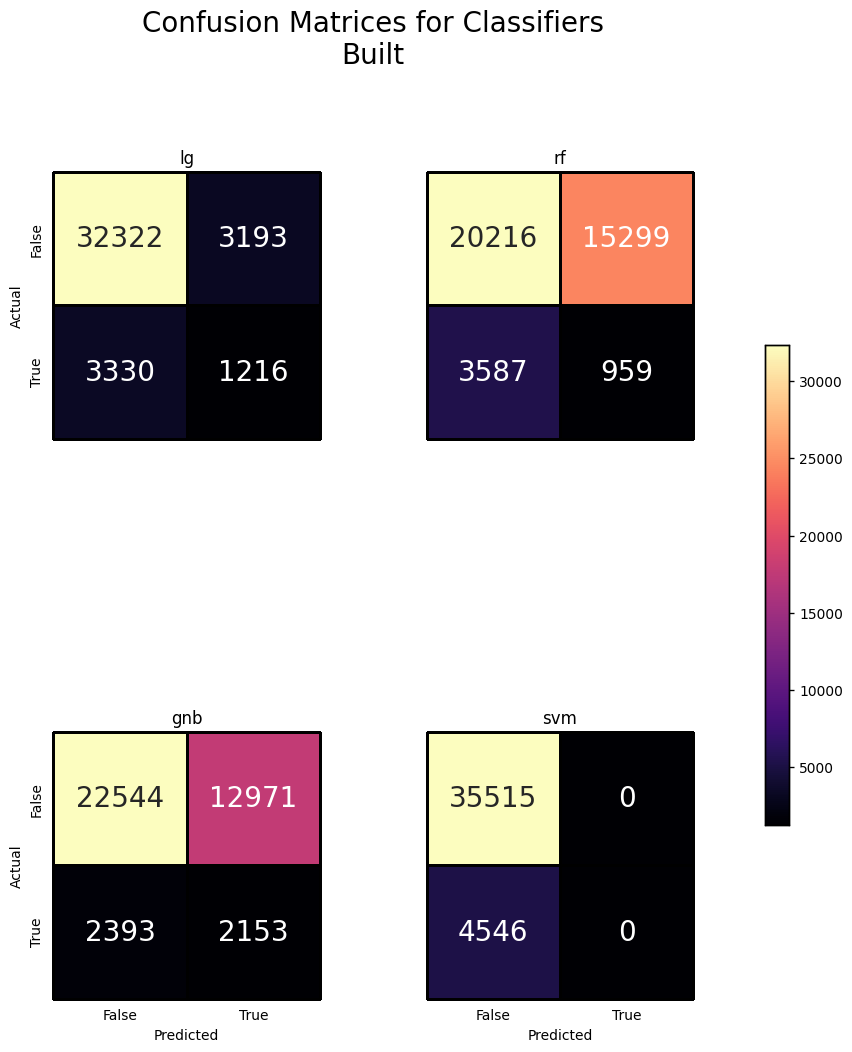

In [ ]:
from sklearn.model_selection import cross_val_predict
fig, axs = plt.subplots(2, 2, figsize=(8, 12))
fig.tight_layout(pad = 10.0)
cbar_ax = fig.add_axes([.99, .3, .03, .4])

for i, (ax, (mod_name, model)) in enumerate(zip(axs.flat, models.items())):
    preds = cross_val_predict(
        model, X, y, cv=5, n_jobs = -1)
    cm = confusion_matrix(y, preds)
    im = sns.heatmap(cm, annot=True, square=True,
                     cbar=i == 0,
                     cbar_ax=None if i else cbar_ax,
                     xticklabels=['False', 'True'],
                     yticklabels=['False', 'True'],
                     fmt='G', cmap='magma', linewidths=1, linecolor="black", clip_on=False,
                     annot_kws={"size": 20}, ax=ax)

    cbar_ax.set_frame_on(True)
    cbar_ax.tick_params(width=.96)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(mod_name)
    ax.label_outer()
    ax.tick_params(left=False, bottom=False)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9,
                    top=0.9, wspace=0.4, hspace=0.4)

for spine in cbar_ax.spines.values():
    spine.set(visible=True, lw=1, edgecolor="black")

plt.suptitle('Confusion Matrices for Classifiers\nBuilt', size=20)

plt.show()

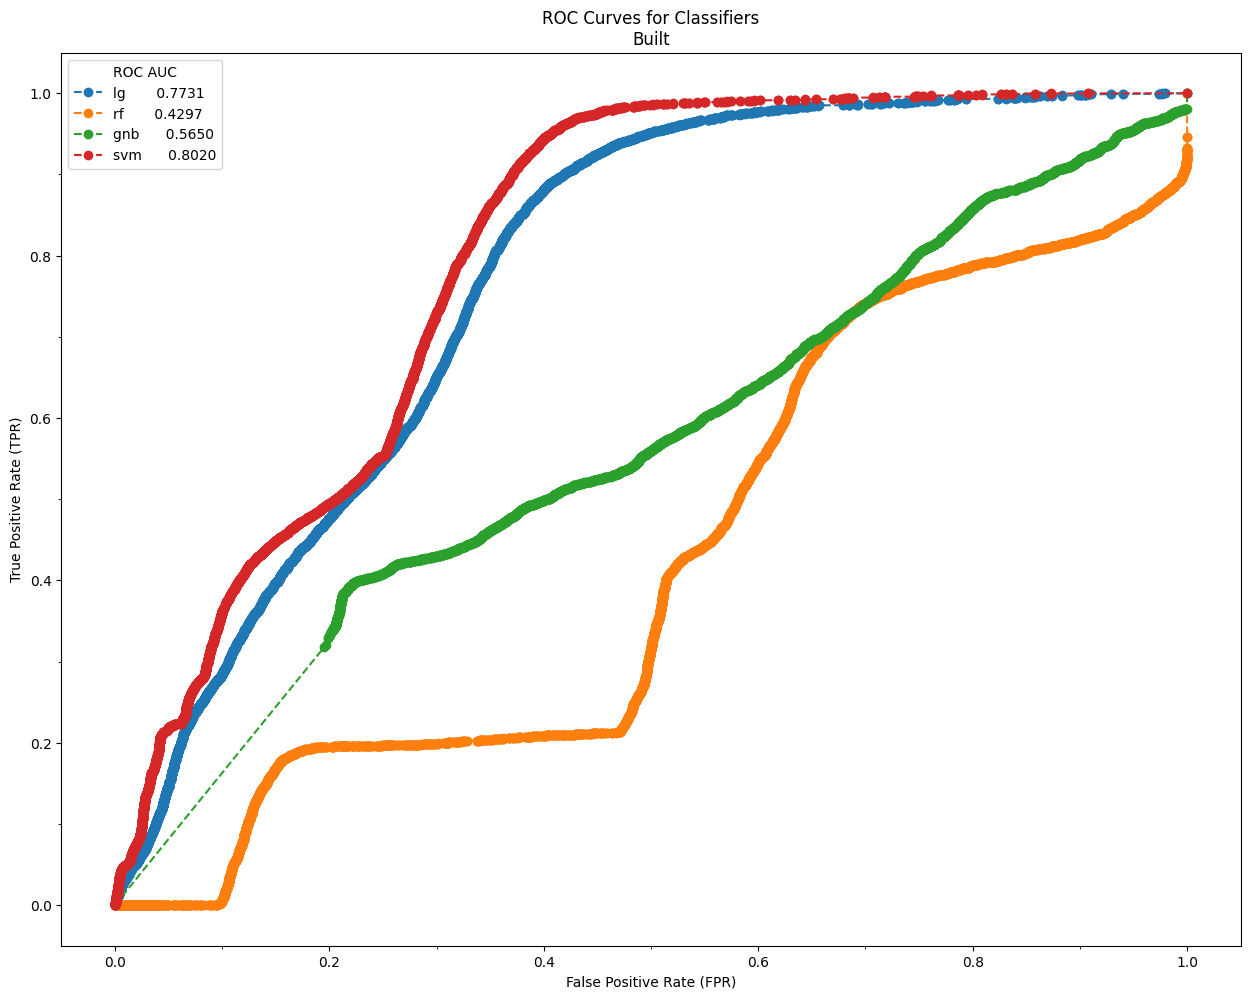

In [ ]:
fig, ax = plt.subplots(figsize = (15, 12))
fig.tight_layout(pad = 10.0)

cv_prob_true = {}
for mod_name, model in models.items():
    cv_probs = cross_val_predict(model, X, y, cv=5, method='predict_proba')
    cv_prob_true[mod_name] = cv_probs[:, 1]

    fpr, tpr, thresh = roc_curve(y, cv_prob_true[mod_name])

    auc = metrics.auc(fpr, tpr)
    ax.plot(fpr, tpr, 'o--', label=f'{mod_name:<9}{auc:.4f}', )

ax.set_title('ROC Curves for Classifiers\nBuilt')
ax.set_ylabel("True Positive Rate (TPR)")
ax.set_xlabel("False Positive Rate (FPR)")
ax.xaxis.set_major_locator(ticker.MultipleLocator(.2))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(.1))
plt.legend(title='ROC AUC')
plt.show()

In [ ]:
cv_prob_true['lg'].shape

(40061,)

In [ ]:
y.iloc[np.argsort(-cv_prob_true['lg'])].values.cumsum()

array([   0,    0,    1, ..., 4546, 4546, 4546])

In [ ]:
X.shape

(40061, 61)

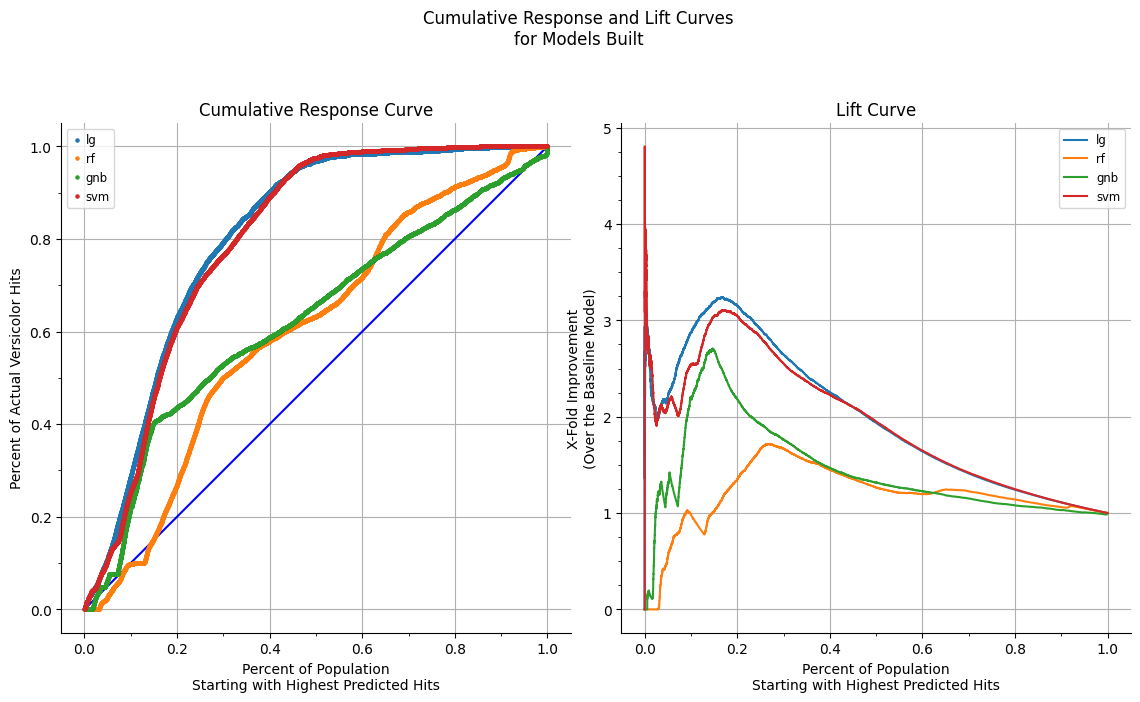

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.8, 7.6))

N = len(y)
xs = np.linspace(1/N, 1, N)

ax1.plot(xs, xs, 'b-')

for mod_name in models:
    # negate so big values come first
    desc_probs = np.argsort(-cv_prob_true[mod_name])

    # cumulative sum then to percent (last value is total)
    cum_perc_desc_probs = y.iloc[desc_probs].cumsum()
    cum_perc_desc_probs = cum_perc_desc_probs / cum_perc_desc_probs[-1:].to_numpy()[0]

    ax1.plot(xs, cum_perc_desc_probs, '.', label=mod_name, markersize=3)

    ax2.plot(xs, cum_perc_desc_probs / np.where(xs > 0, xs, 1),
             label=mod_name)

ax1.set_ylabel("Percent of Actual Versicolor Hits")

ax1.set_xlabel("Percent of Population\n" +
                       "Starting with Highest Predicted Hits")

ax1.legend(fontsize='small', handlelength=1.0,
           handletextpad=0.2, markerscale=1.5)
ax2.legend(fontsize='small')

ax1.set_title("Cumulative Response Curve")
ax2.set_title("Lift Curve")

ax1.set_box_aspect(1)
ax1.grid(True)

ax2.set_box_aspect(1)
ax2.set_ylabel("X-Fold Improvement\n(Over the Baseline Model)")  # not cross-fold!
ax2.set_xlabel("Percent of Population\n" +
               "Starting with Highest Predicted Hits")
ax2.grid(True)

plt.subplots_adjust(bottom=0.15, wspace=0.1)

fig.suptitle('''Cumulative Response and Lift Curves
for Models Built''', y=1.0)

ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))

for ax in (ax1, ax2):

    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
    ax.spines.top.set_visible(False)
    ax.spines.right.set_visible(False)

In [ ]:
svm = SVC()

SVC()

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(svm, param_grid, refit = True, verbose = 3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.887 total time= 2.9min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.887 total time= 2.8min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.887 total time= 2.8min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.887 total time= 2.8min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.887 total time= 2.8min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time= 1.3min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time= 1.3min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time= 1.3min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time= 1.3min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time= 1.3min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.898 total time=  17.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)